In [2]:
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = '2025_Bocconi_20878/Colab/E4_projective_plane/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


# change the directory
%cd /content/drive/My\ Drive/$FOLDERNAME
!pwd
# list all the files
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1rTnvGeoncBp8u_v9vKLGQ3-G2yKm3izo/2025_Bocconi_20878/Colab/E4_projective_plane
/content/drive/.shortcut-targets-by-id/1rTnvGeoncBp8u_v9vKLGQ3-G2yKm3izo/2025_Bocconi_20878/Colab/E4_projective_plane
E1A_lines.ipynb        E2A_horizon_and_affine.ipynb                 E2_data/
E1B_drawcubeiso.ipynb  E2B_affine_measurements.ipynb
E1_data/               E2C_conics_in_homogeneous_coordinates.ipynb


## Affine measurements
This code demonstrates the estimation of vanishing points and vanishing lines to take affine measurements from an image.
Specifically, this code allows to estimate the height of an object standing on the ground, provided:
 - the height of a reference object standing on the ground
 - a vertical vanishing point
 - the vanishing line (horizon) of the ground

Note that for more accurate results the input image should be undistorted.



In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_dir = "E2_data"

def plot_img(img_name):
    path = f"{data_dir}/{img_name}"
    plt.imshow(cv2.imread(path)[:, :, ::-1])
    plt.axis("off")

## Horizon and affine rectification
Identify pairs of parallel lines in the image of a plane and get their vanishing points. Compute the horizon line and use it to perform an affine rectification of the plane.

(-0.5, 2766.5, 2766.5, -0.5)

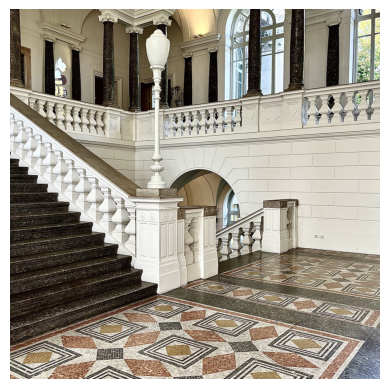

In [4]:
img = cv2.imread(f"{data_dir}/poli2.jpg")[:, :, ::-1]

plt.imshow(img)
plt.axis('off')

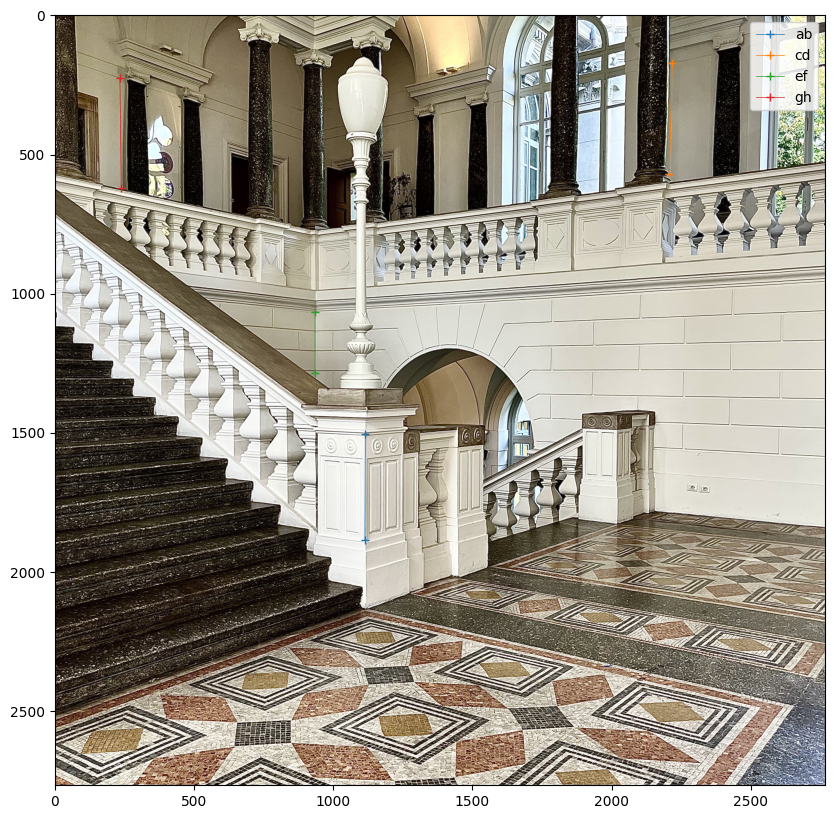

In [5]:
a = np.array([1115, 1505, 1])
b = np.array([1113.5, 1885, 1])
c = np.array([2218, 170, 1])
d = np.array([2208, 570, 1])
e = np.array([934.8, 1065, 1])
f = np.array([934.7, 1285, 1])
g = np.array([233, 224, 1])
h = np.array([238, 620, 1])
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.plot([a[0], b[0]], [a[1], b[1]], marker="+", label="ab", linewidth=0.5)
plt.plot([c[0], d[0]], [c[1], d[1]], marker="+", label="cd", linewidth=0.5)
plt.plot([e[0], f[0]], [e[1], f[1]], marker="+", label="ef", linewidth=0.5)
plt.plot([g[0], h[0]], [g[1], h[1]], marker="+", label="gh", linewidth=0.5)
plt.legend()


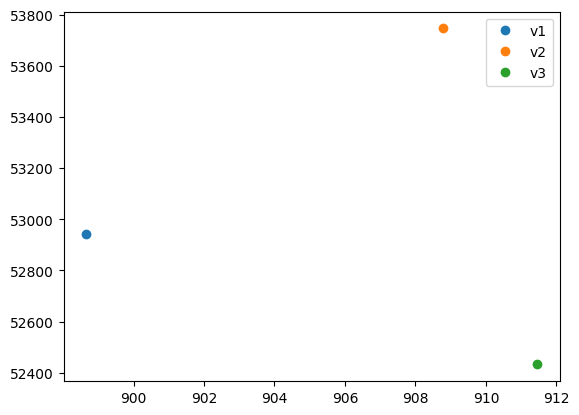

In [6]:
lab = np.cross(a, b)
lcd = np.cross(c, d)
lef = np.cross(e, f)
lgh = np.cross(g, h)

v1 = np.cross(lcd, lgh)
v2 = np.cross(lab, lgh)
v3 = np.cross(lcd, lef)

v1 = v1/v1[-1]
v2 = v2/v2[-1]
v3 = v3/v3[-1]

plt.plot(v1[0], v1[1], "o", label="v1")
plt.plot(v2[0], v2[1], "o", label="v2")
plt.plot(v3[0], v3[1], "o", label="v3")
plt.legend()

#### Estimate a unique vanishing point for vertical lines

Minimizing the algebraic error

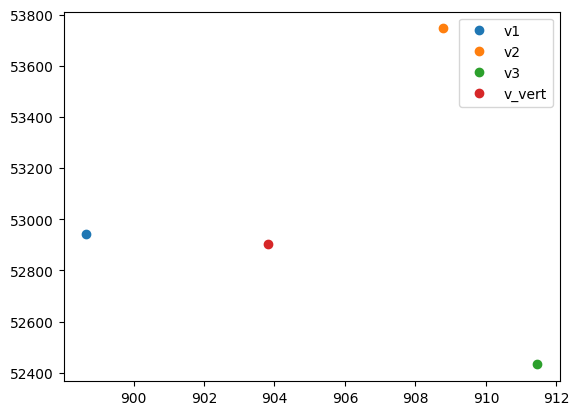

In [7]:
vertical_lines = np.vstack([lab,lcd,lef,lgh])
_,_,vt = np.linalg.svd(vertical_lines)
v_vert = vt[-1,:]
v_vert = v_vert/v_vert[-1]

plt.plot(v1[0], v1[1], "o", label="v1")
plt.plot(v2[0], v2[1], "o", label="v2")
plt.plot(v3[0], v3[1], "o", label="v3")
plt.plot(v_vert[0], v_vert[1], "o", label="v_vert")
plt.legend()

### Rectifying the floor


#### From 2 sets of parallel lines with distinct directions

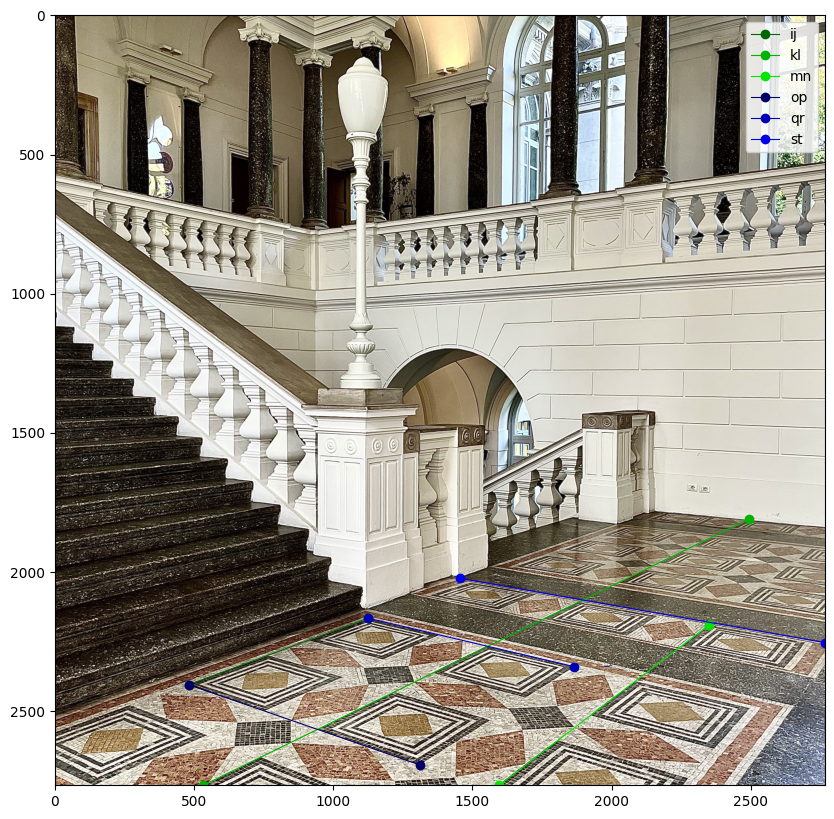

In [8]:
i = np.array([480, 2405, 1])
j = np.array([1125, 2166, 1])
k = np.array([533, 2766, 1])
l = np.array([2493, 1810, 1])
m = np.array([1597, 2766, 1])
n = np.array([2350, 2190, 1])

o = i.copy()
p = np.array([1310, 2693, 1])
q = j.copy()
r = np.array([1865, 2340, 1])
s = np.array([1455, 2023, 1])
t = np.array([2766, 2254, 1])
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([i[0], j[0]], [i[1], j[1]], marker="o", label="ij", linewidth=0.8,color=(0,0.4,0))
plt.plot([k[0], l[0]], [k[1], l[1]], marker="o", label="kl", linewidth=0.8,color=(0,0.7,0))
plt.plot([m[0], n[0]], [m[1], n[1]], marker="o", label="mn", linewidth=0.8,color=(0,0.9,0))
plt.plot([o[0], p[0]], [o[1], p[1]], marker="o", label="op", linewidth=0.8,color=(0,0,0.4))
plt.plot([q[0], r[0]], [q[1], r[1]], marker="o", label="qr", linewidth=0.8,color=(0,0,0.7))
plt.plot([s[0], t[0]], [s[1], t[1]], marker="o", label="st", linewidth=0.8,color=(0,0,0.9))
plt.legend()


#### Compute vanishing points and vanishing line for the floor plane

In [9]:
# blue lines
lop = np.cross(o, p)
lqr = np.cross(q, r)
lst = np.cross(s, t)

lop = lop / lop[-1]
lqr = lqr / lqr[-1]
lst = lst / lst[-1]

floor_lines2 = np.vstack([lop, lqr, lst])
_, _, vt = np.linalg.svd(floor_lines2)
v_floor2 = vt[-1]
print(v_floor2)
v_floor2 = v_floor2/v_floor2[-1]



[-9.10275273e-01  4.14003405e-01  3.27161402e-04]


In [10]:
# green lines
lij = np.cross(i, j)
lkl = np.cross(k, l)
lmn = np.cross(m, n)

lij = lij / lij[-1]
lkl = lkl / lkl[-1]
lmn = lmn / lmn[-1]

floor_lines1 = np.vstack([lij, lkl, lmn])
_, _, vt = np.linalg.svd(floor_lines1)
v_floor1 = vt[-1]
v_floor1 = v_floor1/v_floor1[-1]

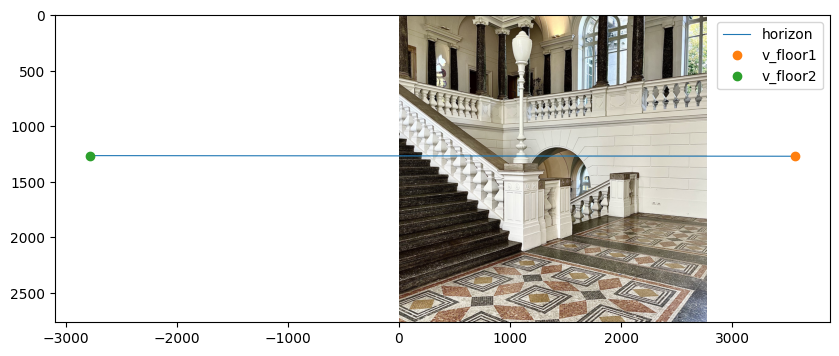

In [11]:
# Compute horizon line for floor plane
horizon = np.cross(v_floor1, v_floor2)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([v_floor1[0], v_floor2[0]], [v_floor1[1], v_floor2[1]],
         label="horizon", linewidth=0.8)

plt.plot(v_floor1[0], v_floor1[1], "o", label="v_floor1")
plt.plot(v_floor2[0], v_floor2[1], "o", label="v_floor2")
plt.legend()

#### Build the rectifying homography for the floor plane

In [12]:
# Important: normalize the horizon line coefficients to regularize the homography
horizon = horizon/np.linalg.norm(horizon)

H = np.hstack([np.eye(2), np.zeros((2, 1))])
H = np.vstack([H, horizon])

H = H/H[-1, -1]

# We can check that the horizon is now mapped to the canonical line at the infinity H^(-T)@horizon
print(f"{np.linalg.inv(H).T@horizon.reshape((-1,1))}")


[[0.00000000e+00]
 [1.08420217e-19]
 [9.99999689e-01]]


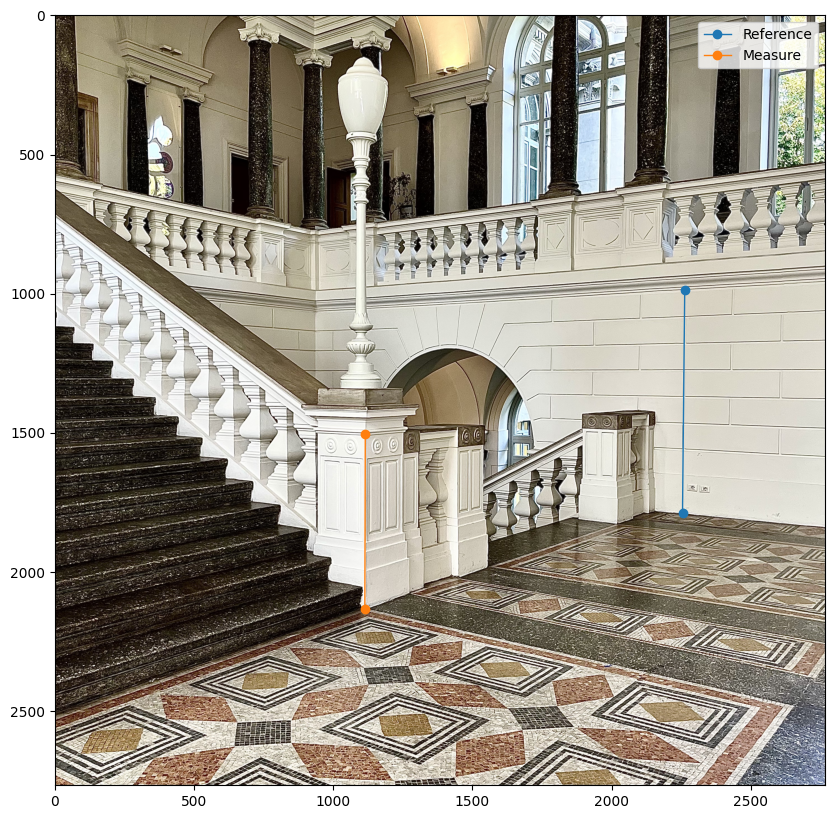

In [13]:
ref_top =  np.array([2263, 985, 1])
ref_bottom =  np.array([2255, 1788, 1])

measure_top =np.array([1115, 1505, 1])
measure_bottom =np.array([1113.5, 2132, 1])


plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
         marker="o", label="Reference", linewidth=1)
plt.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
         marker="o", label="Measure", linewidth=1)
plt.legend()

In [14]:
u = np.cross(np.cross(measure_bottom, ref_bottom), horizon)
u = u/u[-1]

l_measure = np.cross(measure_bottom, v_vert)
ref_top_tilde = np.cross(np.cross(ref_top, u),l_measure)
ref_top_tilde = ref_top_tilde/ref_top_tilde[-1]

dist_ref_top_tilde = np.linalg.norm(ref_top_tilde - ref_bottom)
dist_measure_top = np.linalg.norm(measure_top - measure_bottom)
dist_vert = np.linalg.norm(v_vert - ref_bottom)

# Compute 1d projective transformation mapping the vanishing point to infinity
# (0,1) -> (0,1)
# (v_vert,0) -> (1,0)

H = np.eye(2)
H[-1] = [1,dist_vert]

# Compute the distance ratio

dist_ref_measure_ratio = dist_ref_top_tilde * (dist_vert - dist_measure_top)/(dist_measure_top*(dist_vert-dist_ref_top_tilde))

# Measured dist = ref_dist / dist_ref_measure_ratio
ref_dist = 290
measured_dist = ref_dist / dist_ref_measure_ratio
print(measured_dist)

118.30369888122026


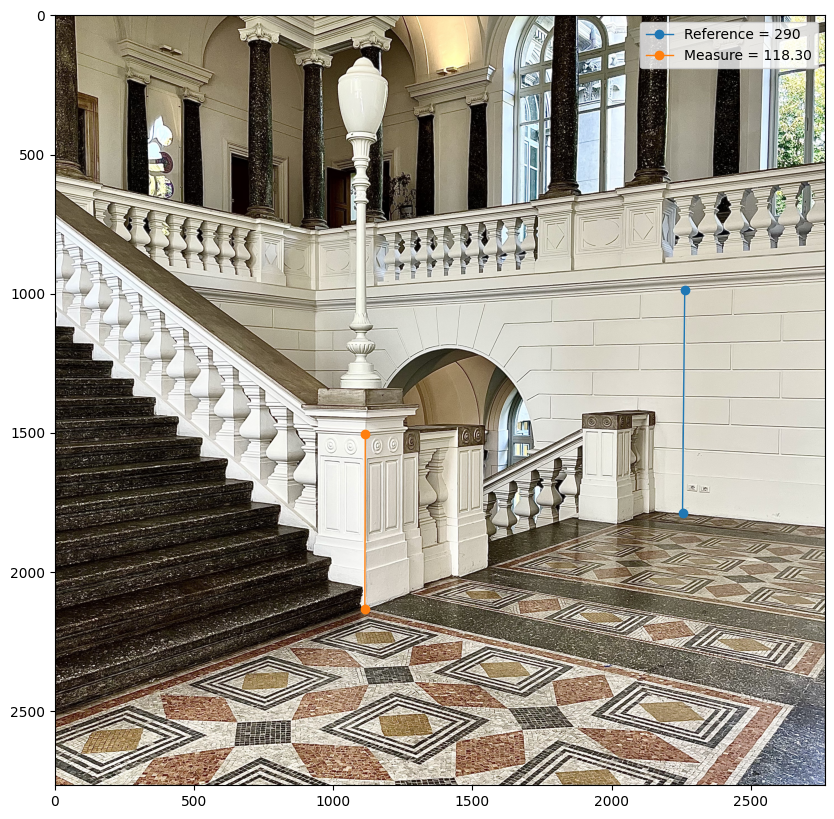

In [15]:

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.plot([ref_top[0], ref_bottom[0]], [ref_top[1], ref_bottom[1]],
         marker="o", label=f"Reference = {ref_dist}", linewidth=1)
plt.plot([measure_top[0], measure_bottom[0]], [measure_top[1], measure_bottom[1]],
         marker="o", label=f"Measure = {measured_dist:.2f}", linewidth=1)
plt.legend()